In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
data = pd.read_csv('train.csv')
data.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496


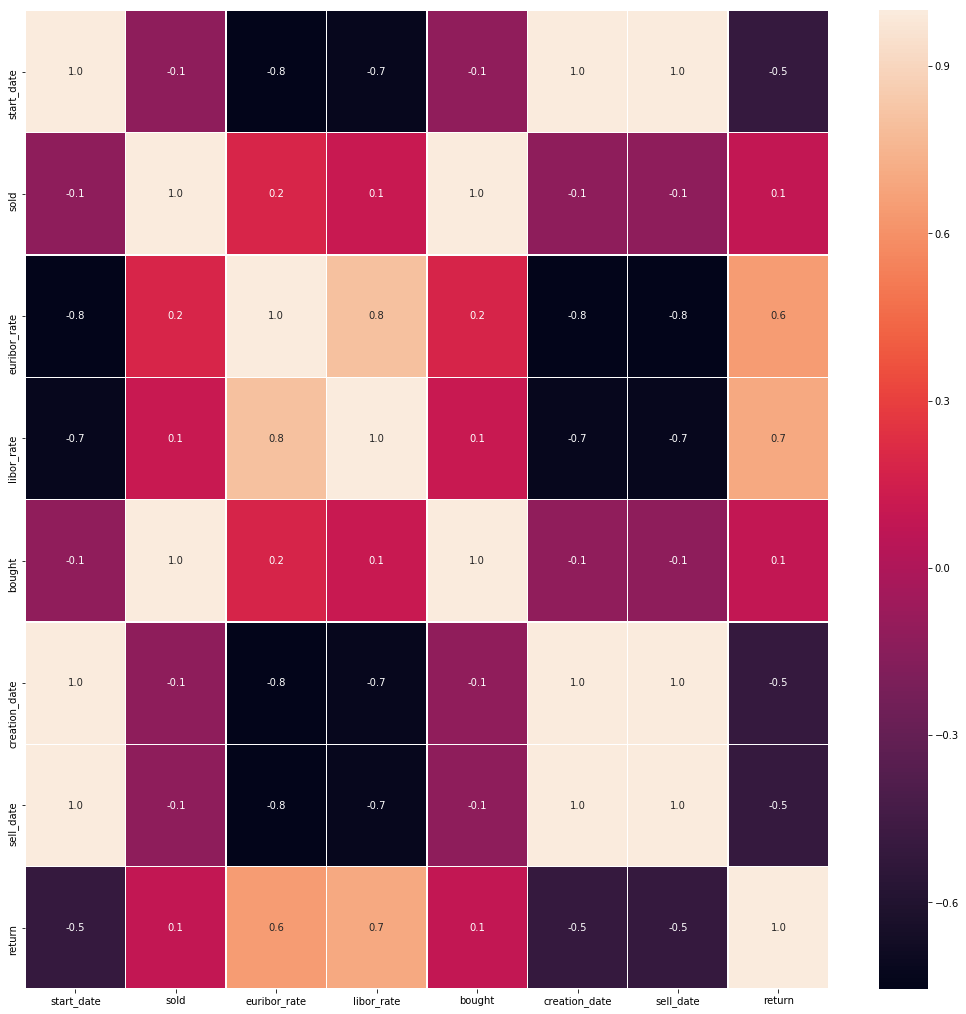

In [3]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

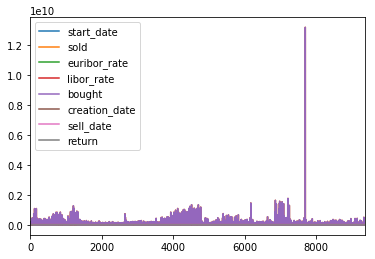

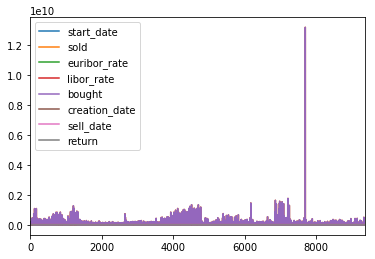

In [8]:
data1 = data.loc[:,:]
data1.plot()
plt.show()

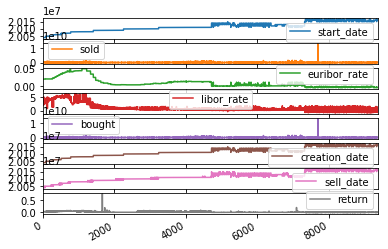

In [9]:
# subplots
data1.plot(subplots = True)
plt.show()

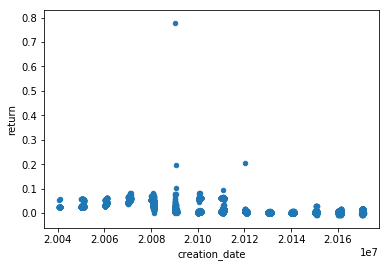

In [15]:
data1.plot(kind = "scatter",x="creation_date",y = "return")
plt.show()


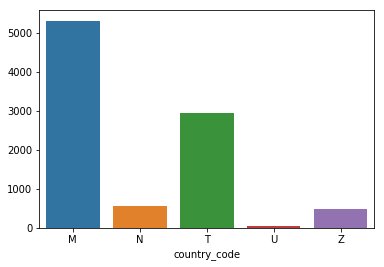

In [97]:
country=data.groupby('country_code').count()['portfolio_id']
sns.barplot(country.index,country.values)
plt.show()

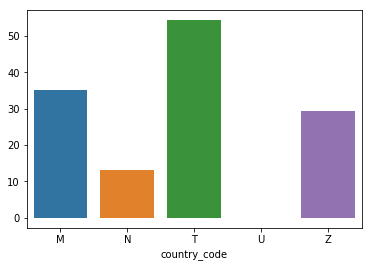

In [98]:
country_return_sum = data.groupby('country_code').sum()['return']
sns.barplot(country_return_sum.index,country_return_sum.values)
plt.show()

#country_return_sum

In [99]:
unit_return_country = country_return_sum/country
unit_return_country

country_code
M    0.006641
N    0.023418
T    0.018381
U   -0.001524
Z    0.061187
dtype: float64

In [100]:
temp =pd.DataFrame(unit_return_country)
temp.columns=[['unit_return']]
temp['country_code']=temp.index

temp

In [101]:
data=data.merge(temp,how='left',on='country_code')
#del temp

In [102]:
data=data.drop(['country_code'],axis=1)
data.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,unit_return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496,0.018381
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496,0.023418
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496,0.018381
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496,0.018381
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496,0.018381


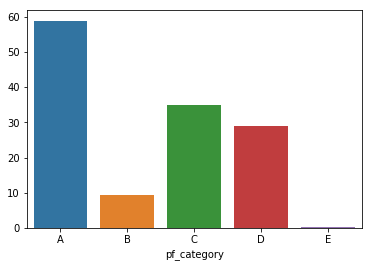

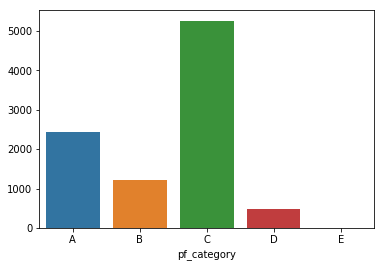

,pf_cat,pf_category
pf_category,,
A,0.024283,A
B,0.007685,B
C,0.006618,C
D,0.061714,D
E,0.066380,E


In [103]:
pf_cat=data.groupby('pf_category').sum()['return']

sns.barplot(pf_cat.index,pf_cat.values)
plt.show()
pf_cat_count = data.groupby('pf_category').count()['portfolio_id']
sns.barplot(pf_cat_count.index,pf_cat_count.values)
plt.show()
pf_cat= pf_cat/pf_cat_count
pf_cat_df = pd.DataFrame(pf_cat)
pf_cat_df.columns=[['pf_cat']]
pf_cat_df['pf_category']=pf_cat_df.index
pf_cat_df

In [104]:
data=data.merge(pf_cat_df,how='left',on='pf_category')
data=data.drop(['pf_category'],axis=1)


In [105]:

data.groupby('office_id').count()['portfolio_id'].argmax()

'OFF00001002'

In [106]:
data['profit_loss']=data.sold-data.bought
data.head()

,portfolio_id,desk_id,office_id,start_date,sold,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,unit_return,pf_cat,profit_loss
0,PF00001002,DSK00001001,OFF00001002,20040720,110000000.0,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496,0.018381,0.007685,190336.749636
1,PF00001003,DSK00001002,OFF00001001,20040709,176671000.0,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496,0.023418,0.024283,662563.265958
2,PF00001005,DSK00001004,OFF00001001,20040723,56474000.0,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496,0.018381,0.024283,94467.039667
3,PF00001006,DSK00001005,OFF00001001,20040609,164813000.0,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496,0.018381,0.024283,304158.569044
4,PF00001007,DSK00001005,OFF00001002,20040609,140800000.0,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496,0.018381,0.007685,259843.134474


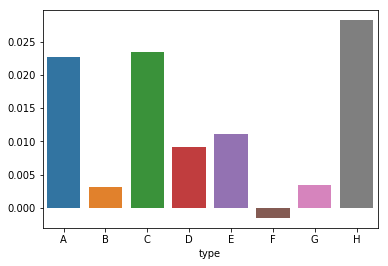

In [107]:
return_type=data.groupby('type')['return'].sum()/data.groupby('type').count()['portfolio_id']
sns.barplot(return_type.index,return_type.values)
plt.show()
return_type_df = pd.DataFrame(return_type)
return_type_df.columns=[['return_type']]
return_type_df['type'] = return_type_df.index
data=data.merge(return_type_df,how='left',on='type')
data=data.drop(['type'],axis=1)

In [112]:
data.head()

,portfolio_id,desk_id,office_id,start_date,sold,euribor_rate,libor_rate,bought,creation_date,indicator_code,...,unit_return,pf_cat,profit_loss,return_type,date_gapslc,date_gapcst,return_currency,start_month,creation_month,sell_month
0,PF00001002,DSK00001001,OFF00001002,20040720,110000000.0,0.02074,2.332216,1.098097e+08,20040720,NaN,...,0.018381,0.007685,190336.749636,0.003099,92,-92,0.018381,7,7,8
1,PF00001003,DSK00001002,OFF00001001,20040709,176671000.0,0.02074,5.269617,1.760084e+08,20040723,NaN,...,0.023418,0.024283,662563.265958,0.023418,89,-89,0.023418,7,7,8
2,PF00001005,DSK00001004,OFF00001001,20040723,56474000.0,0.02074,2.332216,5.637953e+07,20040723,NaN,...,0.018381,0.024283,94467.039667,0.022598,94,-94,0.018381,7,7,8
3,PF00001006,DSK00001005,OFF00001001,20040609,164813000.0,0.02074,2.332216,1.645088e+08,20040723,NaN,...,0.018381,0.024283,304158.569044,0.022598,-10,10,0.018381,6,7,7
4,PF00001007,DSK00001005,OFF00001002,20040609,140800000.0,0.02074,2.332216,1.405402e+08,20040723,NaN,...,0.018381,0.007685,259843.134474,0.003099,-10,10,0.018381,6,7,7


In [109]:
data['date_gapslc']=data.sell_date - data.creation_date
data['date_gapcst'] = data.creation_date - data.sell_date

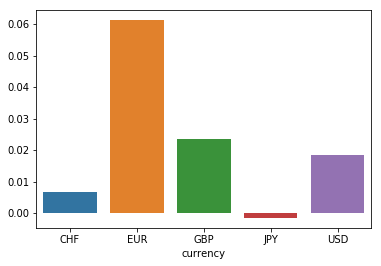

In [110]:
return_currency=data.groupby('currency')['return'].sum()/data.groupby('currency').count()['portfolio_id']
sns.barplot(return_currency.index,return_currency.values)
plt.show()
return_currency_df = pd.DataFrame(return_currency)
return_currency_df.columns=[['return_currency']]
return_currency_df['currency'] = return_currency_df.index
data=data.merge(return_currency_df,how='left',on='currency')
data=data.drop(['currency'],axis=1)

In [111]:
data['start_month']=data.start_date.astype(str).str[4:6].astype(np.int64)
data['creation_month']=data.creation_date.astype(str).str[4:6].astype(np.int64)
data['sell_month']=data.sell_date.astype(str).str[4:6].astype(np.int64)


In [113]:
return_startmonth=data.groupby('start_month')['return'].sum()/data.groupby('start_month').count()['portfolio_id']
return_startmonth_df = pd.DataFrame(return_startmonth)
return_startmonth_df.columns=[['return_startmonth']]
return_startmonth_df['start_month'] = return_startmonth_df.index
data=data.merge(return_startmonth_df,how='left',on='start_month')
data=data.drop(['start_month'],axis=1)
#


In [114]:
return_creationmonth=data.groupby('creation_month')['return'].sum()/data.groupby('creation_month').count()['portfolio_id']
return_creationmonth_df = pd.DataFrame(return_creationmonth)
return_creationmonth_df.columns=[['return_creationmonth']]
return_creationmonth_df['creation_month'] = return_creationmonth_df.index
data=data.merge(return_creationmonth_df,how='left',on='creation_month')
data=data.drop(['creation_month'],axis=1)

In [115]:
return_sellmonth=data.groupby('sell_month')['return'].sum()/data.groupby('sell_month').count()['portfolio_id']
return_sellmonth_df = pd.DataFrame(return_sellmonth)
return_sellmonth_df.columns=[['return_sellmonth']]
return_sellmonth_df['sell_month'] = return_sellmonth_df.index
data=data.merge(return_sellmonth_df,how='left',on='sell_month')
data=data.drop(['sell_month'],axis=1)

In [116]:
data.head()

,portfolio_id,desk_id,office_id,start_date,sold,euribor_rate,libor_rate,bought,creation_date,indicator_code,...,unit_return,pf_cat,profit_loss,return_type,date_gapslc,date_gapcst,return_currency,return_startmonth,return_creationmonth,return_sellmonth
0,PF00001002,DSK00001001,OFF00001002,20040720,110000000.0,0.02074,2.332216,1.098097e+08,20040720,NaN,...,0.018381,0.007685,190336.749636,0.003099,92,-92,0.018381,0.012915,0.01309,0.012433
1,PF00001003,DSK00001002,OFF00001001,20040709,176671000.0,0.02074,5.269617,1.760084e+08,20040723,NaN,...,0.023418,0.024283,662563.265958,0.023418,89,-89,0.023418,0.012915,0.01309,0.012433
2,PF00001005,DSK00001004,OFF00001001,20040723,56474000.0,0.02074,2.332216,5.637953e+07,20040723,NaN,...,0.018381,0.024283,94467.039667,0.022598,94,-94,0.018381,0.012915,0.01309,0.012433
3,PF00001006,DSK00001005,OFF00001001,20040609,164813000.0,0.02074,2.332216,1.645088e+08,20040723,NaN,...,0.018381,0.024283,304158.569044,0.022598,-10,10,0.018381,0.013441,0.01309,0.012517
4,PF00001007,DSK00001005,OFF00001002,20040609,140800000.0,0.02074,2.332216,1.405402e+08,20040723,NaN,...,0.018381,0.007685,259843.134474,0.003099,-10,10,0.018381,0.013441,0.01309,0.012517


In [117]:
return_creationmonth_df

,return_creationmonth,creation_month
creation_month,,
1,0.013370,1
2,0.010923,2
3,0.010412,3
4,0.013277,4
5,0.011488,5
6,0.014069,6
7,0.013090,7
8,0.013420,8
9,0.016034,9


In [69]:
data.columns

Index(['portfolio_id', 'desk_id', 'office_id', 'start_date', 'sold',
       'euribor_rate', 'libor_rate', 'bought', 'creation_date',
       'indicator_code', 'sell_date', 'hedge_value', 'status', 'return',
       'unit_return', 'pf_cat', 'profit_loss', 'return_type', 'date_gapslc',
       'date_gapcst', 'return_currency', 'return_startmonth',
       'return_creationmonth', 'return_sellmonth'],
      dtype='object')

In [118]:
use_col = ['portfolio_id', 'sold',
       'euribor_rate', 'libor_rate', 'bought', 
       'unit_return', 'pf_cat', 'profit_loss', 'return_type', 'date_gapslc',
       'date_gapcst', 'return_currency','return_startmonth',
       'return_creationmonth', 'return_sellmonth']

In [119]:
X=data[use_col]
y=data['return']

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7)

In [150]:
X_train=X
y_train=y
X_train=X_train.drop(['portfolio_id'],axis=1)
X_train=X_train.fillna(X_train.mean())

In [122]:
from sklearn.svm import SVR

In [123]:
#svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)#
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
#y_rbf = svr_rbf.fit(X_train, y_train).predict(X_train)
#y_lin = svr_lin.fit(X_train, y_train).predict(X_train)
#y_poly = svr_poly.fit(X_train, y_train).predict(X_train)

In [124]:
#from sklearn import linear_model
#reg = linear_model.Ridge (alpha = .5)

In [125]:
#reg.fit(X_train,y_train)

In [126]:
#predict_ridge = reg.predict(X_train)

In [127]:
#predict_ridge

In [128]:
#y_pred = pd.DataFrame(predict_ridge)

In [129]:
#r2_score(y_train,y_pred)

In [130]:
X_test=X_test.drop(['portfolio_id'],axis=1)
X_test=X_test.fillna(X_test.mean())


In [131]:
#y_pred = pd.DataFrame(y_pred)

In [132]:
#r2_score(y_test,y_pred)

In [133]:
#X_train1 = X_train.drop(['date_gapslc','date_gapcst'],axis=1)

In [134]:
from xgboost import XGBRegressor

In [135]:
model = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [151]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [152]:
model.predict(X_train)

array([ 0.02843484,  0.05344978,  0.03154689, ...,  0.00493148,
        0.00448221,  0.00493145], dtype=float32)

In [153]:
r2_score(y_train,pd.DataFrame(model.predict(X_train)))

0.88389719058536431

In [50]:
#X_test1 = X_test.drop(['date_gapslc','date_gapcst'],axis=1)

In [51]:
#r2_score(y_test,pd.DataFrame(model.predict(X_test)))

# Covert your Test data into expected form

In [139]:
test = pd.read_csv('test.csv')
pfid=test.portfolio_id 

In [140]:
test.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001001,DSK00001001,OFF00001001,A,20040720,171831000.0,T,0.02074,USD,2.332216,1.715337e+08,20040720,NaN,20040812,A,NaN,NaN
1,PF00001004,DSK00001003,OFF00001002,B,20040723,56485000.0,T,0.02074,USD,2.332216,5.638038e+07,20040723,NaN,20040719,B,NaN,NaN
2,PF00001009,DSK00001007,OFF00001001,A,20040607,41734000.0,T,0.02074,USD,2.332216,4.166179e+07,20040726,NaN,20040709,A,NaN,NaN
3,PF00001013,DSK00001011,OFF00001001,A,20040716,82951000.0,T,0.02074,USD,2.332216,8.250936e+07,20040726,NaN,20041019,A,NaN,NaN
4,PF00001014,DSK00001012,OFF00001001,A,20040713,73293000.0,T,0.02074,USD,2.332216,7.317055e+07,20040726,NaN,20040813,A,NaN,NaN


In [141]:
test['start_month']=test.start_date.astype(str).str[4:6].astype(np.int64)
test['creation_month']=test.creation_date.astype(str).str[4:6].astype(np.int64)
test['sell_month']=test.sell_date.astype(str).str[4:6].astype(np.int64)


In [142]:
return_creationmonth_df

,return_creationmonth,creation_month
creation_month,,
1,0.013370,1
2,0.010923,2
3,0.010412,3
4,0.013277,4
5,0.011488,5
6,0.014069,6
7,0.013090,7
8,0.013420,8
9,0.016034,9


In [143]:
test=test.merge(temp,how='left',on='country_code')
test=test.merge(pf_cat_df,how='left',on='pf_category')
test['profit_loss']=test.sold-test.bought
test=test.merge(return_type_df,how='left',on='type')
test['date_gapslc']=test.sell_date - test.creation_date
test['date_gapcst'] = test.creation_date - test.sell_date
test=test.merge(return_currency_df,how='left',on='currency')
test=test.merge(return_startmonth_df,how='left',on='start_month')
test=test.merge(return_creationmonth_df,how='left',on='creation_month')
test=test.merge(return_sellmonth_df,how='left',on='sell_month')

test=test[use_col]
#data=data.drop([,'pf_category'],axis=1)

In [144]:
test=test.drop(['portfolio_id'],axis=1)

In [145]:
X_train.head()

,sold,euribor_rate,libor_rate,bought,unit_return,pf_cat,profit_loss,return_type,date_gapslc,date_gapcst,return_currency,return_startmonth,return_creationmonth,return_sellmonth
6687,55000000.0,0.00113,0.683943,5.496910e+07,0.018381,0.007685,30904.846831,0.003099,302,-302,0.018381,0.013441,0.014069,0.015395
2700,58080000.0,0.00428,0.982687,5.781863e+07,0.061187,0.061714,261371.880539,0.011170,5,-5,0.061187,0.013441,0.014069,0.011280
2464,11000000.0,0.00415,1.310573,1.099888e+07,0.023418,0.007685,1117.968555,0.023418,7,-7,0.023418,0.010423,0.010412,0.010659
9152,26554000.0,-0.00017,-0.559409,2.655311e+07,0.006641,0.006618,885.133333,0.011170,78,-78,0.006641,0.013847,0.013277,0.013480
1749,37345000.0,0.00931,1.517774,3.734386e+07,0.018381,0.024283,1141.062351,0.022598,1,-1,0.018381,0.012035,0.011488,0.013480


In [154]:
pred=pd.DataFrame(model.predict(test))
pred.head()

,0
0,0.030005
1,0.027303
2,0.024705
3,0.027322
4,0.028267


In [155]:
answerw=pd.concat([pfid,pred],axis=1)
answerw.columns=[['portfolio_id','return']]
answerw.head()

,portfolio_id,return
0,PF00001001,0.030005
1,PF00001004,0.027303
2,PF00001009,0.024705
3,PF00001013,0.027322
4,PF00001014,0.028267


In [156]:
answerw.to_csv('sol2.csv',index=False)